# Flash-X simulation results for Benchmark Case #2 

In [1]:
import os
import itertools
from types import SimpleNamespace
import numpy
import matplotlib.pyplot as pyplot
from scipy.interpolate import make_interp_spline
from shapely import geometry
import LocalModule

In [2]:
DsetDirs, FileTags = LocalModule.case2_refinement_dict()
Results = dict()
for key in DsetDirs:
    Datasets = LocalModule.read_datasets(DsetDirs[key], FileTags[key])
    Results[key] = numpy.array([LocalModule.process_dataset(Dataset) for Dataset in Datasets])

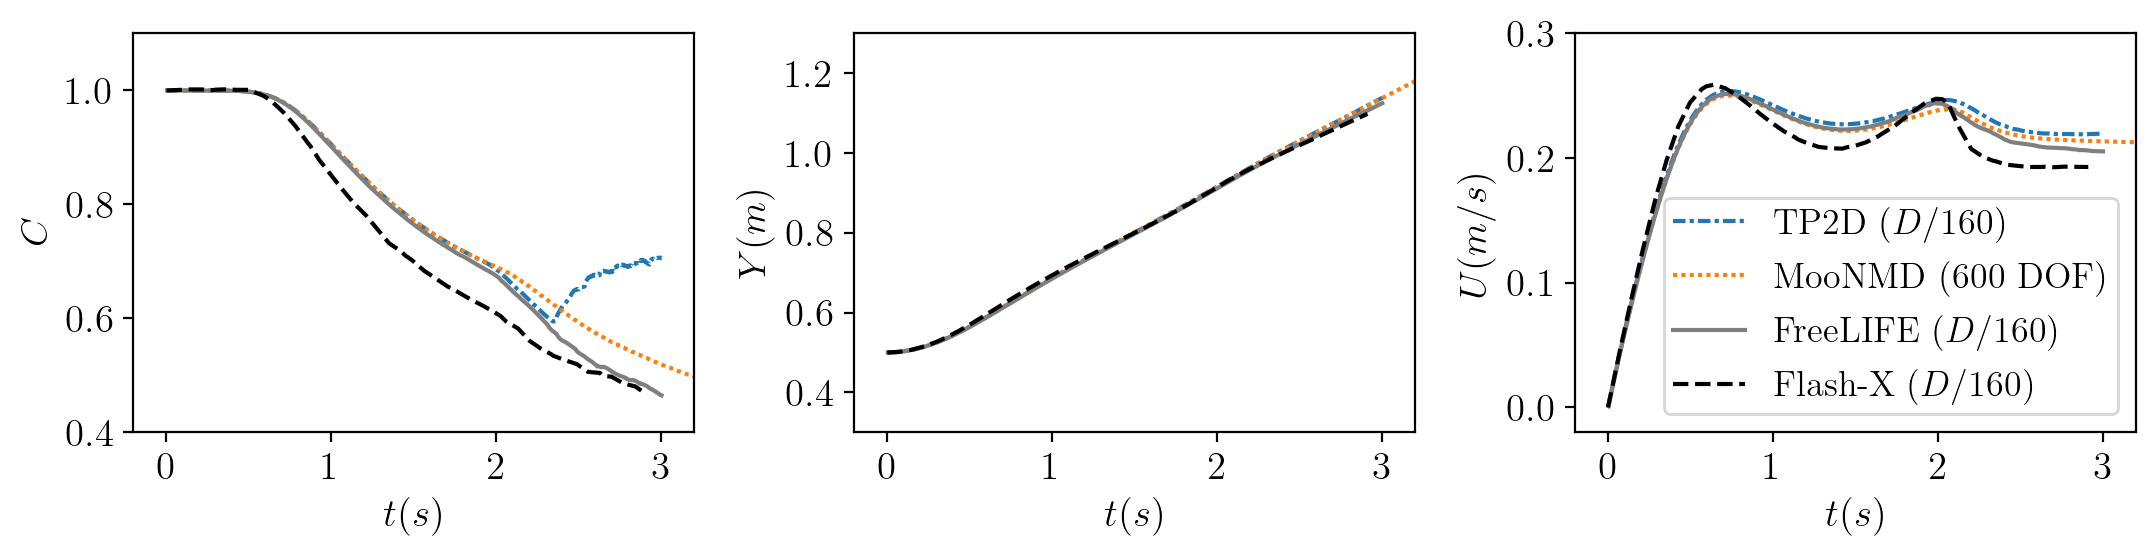

In [3]:
Reference1 = numpy.loadtxt("Benchmarks/Reference/data_bench_quantities/c2g1l7.txt")
Reference2 = numpy.loadtxt("Benchmarks/Reference/data_bench_quantities/c2g2l3.txt")
Reference3 = numpy.loadtxt("Benchmarks/Reference/data_bench_quantities/c2g3l3.txt")
pyplot.rc("font", family="serif", size=14, weight="bold")
pyplot.rc("axes", labelweight="bold", titleweight="bold")
pyplot.rc("text", usetex=True)

QuantIndex = [2, 3, 4]
Figure, PlotList = pyplot.subplots(1, len(QuantIndex), figsize=(11,3), dpi=200)

for Plot, Index in zip(PlotList, QuantIndex):

    Linestyles = itertools.cycle(("--","-.", ":", "-"))
    Colors = itertools.cycle(("black","tab:red","tab:green","tab:blue"))
    Linewidths = itertools.cycle((1.5,1.5,1.5,1.5))

    Plot.plot(Reference1[:,0], Reference1[:,Index], linestyle=(0, (3, 1, 1, 1)), linewidth=1.5)
    Plot.plot(Reference3[:,0], Reference3[:,Index], linestyle=(0, (1, 1)), linewidth=1.5)
    Plot.plot(Reference2[:,0], Reference2[:,Index], linewidth=1.5, color='tab:gray')
              #marker='s', markevery=30, markersize=8, color='tab:gray')
    
    for key in ["Case2/h320"]:
        #spline = make_interp_spline(Results[key][:-10,0]*LocalModule.SIM_SCALE[0], 
        #                            Results[key][:-10,Index]*LocalModule.SIM_SCALE[Index])
        
        #time = numpy.linspace(0,3,100)
        
        Plot.plot(Results[key][:-10,0]*LocalModule.SIM_SCALE[0], 
                  Results[key][:-10,Index]*LocalModule.SIM_SCALE[Index], 
                  linewidth=next(Linewidths), linestyle=next(Linestyles), color=next(Colors))

    if Index == 2:
        Plot.set_ylim([0.4,1.1])
        Plot.set_ylabel(r"$C$", rotation=90)
    elif Index == 3:
        Plot.set_ylim([0.3,1.3])
        Plot.set_ylabel(r"$Y (m)$", rotation=90)
    elif Index == 4:
        Plot.set_ylim([-0.02,0.3])
        Plot.set_ylabel(r"$U (m/s)$", rotation=90)
        
    Plot.set_xlim([-0.2,3.2])
    Plot.set_xlabel(r"$t(s)$")

pyplot.legend(["TP2D ($D/160$)", "MooNMD ($600$ DOF)", "FreeLIFE ($D/160$)", f"Flash-X ($D/160$)"], borderpad=0.25, fontsize=13)
pyplot.tight_layout()
#pyplot.savefig("/Users/Akash/Desktop/fig_ref_compare.png")
pyplot.show()

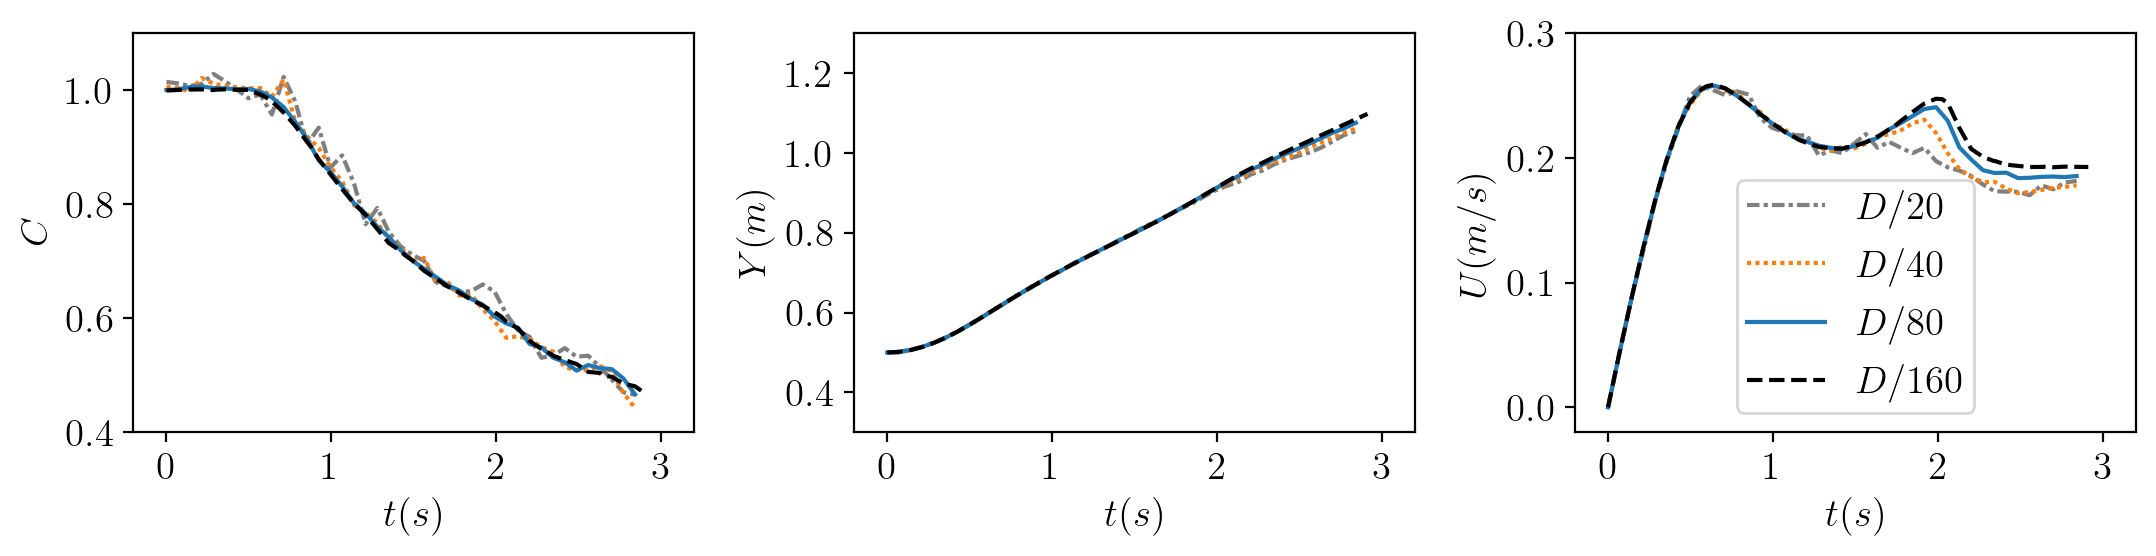

In [4]:
pyplot.rc("font", family="serif", size=14, weight="bold")
pyplot.rc("axes", labelweight="bold", titleweight="bold")
pyplot.rc("text", usetex=True)

QuantIndex = [2, 3, 4]
Figure, PlotList = pyplot.subplots(1, len(QuantIndex), figsize=(11,3), dpi=200)

for Plot, Index in zip(PlotList, QuantIndex):

    Linestyles = itertools.cycle(((0, (3, 1, 1, 1)),(0, (1, 1)), "-", "--"))
    Colors = itertools.cycle(("tab:gray","tab:orange","tab:blue","black"))
    Linewidths = itertools.cycle((1.5,1.5,1.5,1.5))
    
    for key in Results:
        end = -10
        if key == "Case2/h320": end = -10
            
        Plot.plot(Results[key][:end,0]*LocalModule.SIM_SCALE[0], 
                  Results[key][:end,Index]*LocalModule.SIM_SCALE[Index], 
                  linewidth=next(Linewidths), linestyle=next(Linestyles), color=next(Colors))

    if Index == 2:
        Plot.set_ylim([0.4,1.1])
        Plot.set_ylabel(r"$C$", rotation=90)
    elif Index == 3:
        Plot.set_ylim([0.3,1.3])
        Plot.set_ylabel(r"$Y (m)$", rotation=90)
    elif Index == 4:
        Plot.set_ylim([-0.02,0.3])
        Plot.set_ylabel(r"$U (m/s)$", rotation=90)
        
    Plot.set_xlim([-0.2,3.2])
    Plot.set_xlabel(r"$t(s)$")

pyplot.legend([f"$D/20$",f"$D/40$",f"$D/80$",f"$D/160$"], borderpad=0.25)
pyplot.tight_layout()
#pyplot.savefig("/Users/Akash/Desktop/fig_grid_compare.png")
pyplot.show()

In [5]:
DsetDirs, FileTags = LocalModule.case2_refinement_contour_dict()
Datasets = {}
for key in DsetDirs:
    Datasets[key] = LocalModule.read_datasets(DsetDirs[key], FileTags[key])

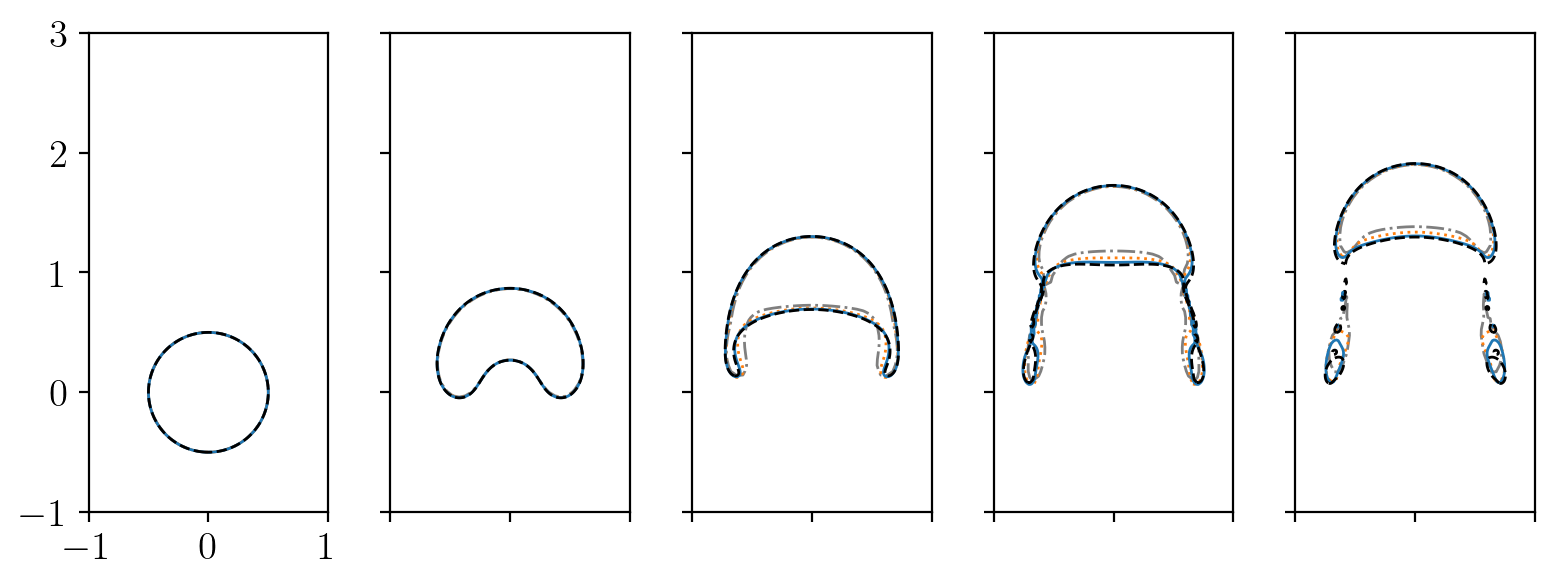

In [6]:
import boxkit
import boxkit.resources.flash as flash_box

pyplot.rc("font", family="serif", size=14, weight="bold")
pyplot.rc("axes", labelweight="bold", titleweight="bold")
pyplot.rc("text", usetex=True)

FileIndex = [*range(5)]
Figure, PlotList = pyplot.subplots(1, len(FileIndex), figsize=(8,3), dpi=200)

for Plot, Index in zip(PlotList,FileIndex):

    Linestyles = itertools.cycle(("-.",":", "-", "--"))
    Colors = itertools.cycle(("tab:gray","tab:orange","tab:blue","black"))
    Linewidths = itertools.cycle((1,1,1,1))

    for key in Datasets:
        Merged = boxkit.mergeblocks(Datasets[key][Index], ["dfun"])
        Merged.fill_guard_cells()
        flash_box.lset_plot_contour_2d(Plot, Merged, 
                                       linestyles=next(Linestyles), 
                                       linewidths=next(Linewidths), 
                                       colors=next(Colors)) 

    Plot.set_aspect('equal')
    Plot.set_xlim([-1,1])
    Plot.set_ylim([-1,3])
    if Index != 0:
        Plot.xaxis.set_tick_params(labelbottom=False)
        Plot.yaxis.set_tick_params(labelbottom=False)

#pyplot.axis('equal')
#pyplot.savefig("/Users/Akash/Desktop/fig_grid_bubble.png")
pyplot.tight_layout()
pyplot.show()

In [7]:
# from sklearn.neighbors import NearestNeighbors
# import networkx as nx

# Reference1 = numpy.loadtxt("Benchmarks/Reference/data_bubble_shapes/c2g1l8s.txt")
# Reference2 = numpy.loadtxt("Benchmarks/Reference/data_bubble_shapes/c2g2l3s.txt")
# Reference3 = numpy.loadtxt("Benchmarks/Reference/data_bubble_shapes/c2g3l4s.txt")

# pyplot.rc("font", family="serif", size=14, weight="bold")
# pyplot.rc("axes", labelweight="bold", titleweight="bold")
# pyplot.rc("text", usetex=True)

# Figure, Axes = pyplot.subplots(figsize=(3,3), dpi=200)

# Linestyles = itertools.cycle(("--","-.", ":", "-"))
# Colors = itertools.cycle(("black","tab:red","tab:green","tab:blue"))
# Linewidths = itertools.cycle((1.5,1.5,1.5,1.5))

# points = numpy.c_[Reference2[:,0], Reference2[:,1]]
# clf = NearestNeighbors().fit(points)
# G = clf.kneighbors_graph()
# T = nx.from_scipy_sparse_matrix(G)
# order = list(nx.dfs_preorder_nodes(T, 0))
# xx = Reference2[:,0][order]
# yy = Reference2[:,1][order]

# #Axes.plot(Reference1[:,0], Reference1[:,1], linestyle=(0, (3, 1, 1, 1)), linewidth=1.5)
# #Axes.plot(Reference3[:,0], Reference3[:,1], linestyle=(0, (1, 1)), linewidth=1.5)
# Axes.plot(xx/LocalModule.SIM_LENGTH_SCALE-1, yy/LocalModule.SIM_LENGTH_SCALE+LocalModule.SIM_YMIN, 
#              color='tab:gray')
# #Axes.plot(*Polygon2.exterior.xy, linewidth=1.5, color='tab:gray')

# Merged = boxkit.mergeblocks(Datasets["Case2/h320"][3], ["dfun"])
# Merged.fill_guard_cells()
# flash_box.lset_plot_contour_2d(Axes, Merged,
#                                linestyles=next(Linestyles),
#                                linewidths=next(Linewidths),
#                                colors=next(Colors)) 

# pyplot.axis('equal')
# #pyplot.savefig("/Users/Akash/Desktop/fig_grid_bubble.png")
# pyplot.tight_layout()
# pyplot.show()

In [8]:
DsetDirs, FileTags = LocalModule.case2_outflow_dict()
Results = dict()
for key in DsetDirs:
    Datasets = LocalModule.read_datasets(DsetDirs[key], FileTags[key])
    Results[key] = numpy.array([LocalModule.process_dataset(Dataset) for Dataset in Datasets])

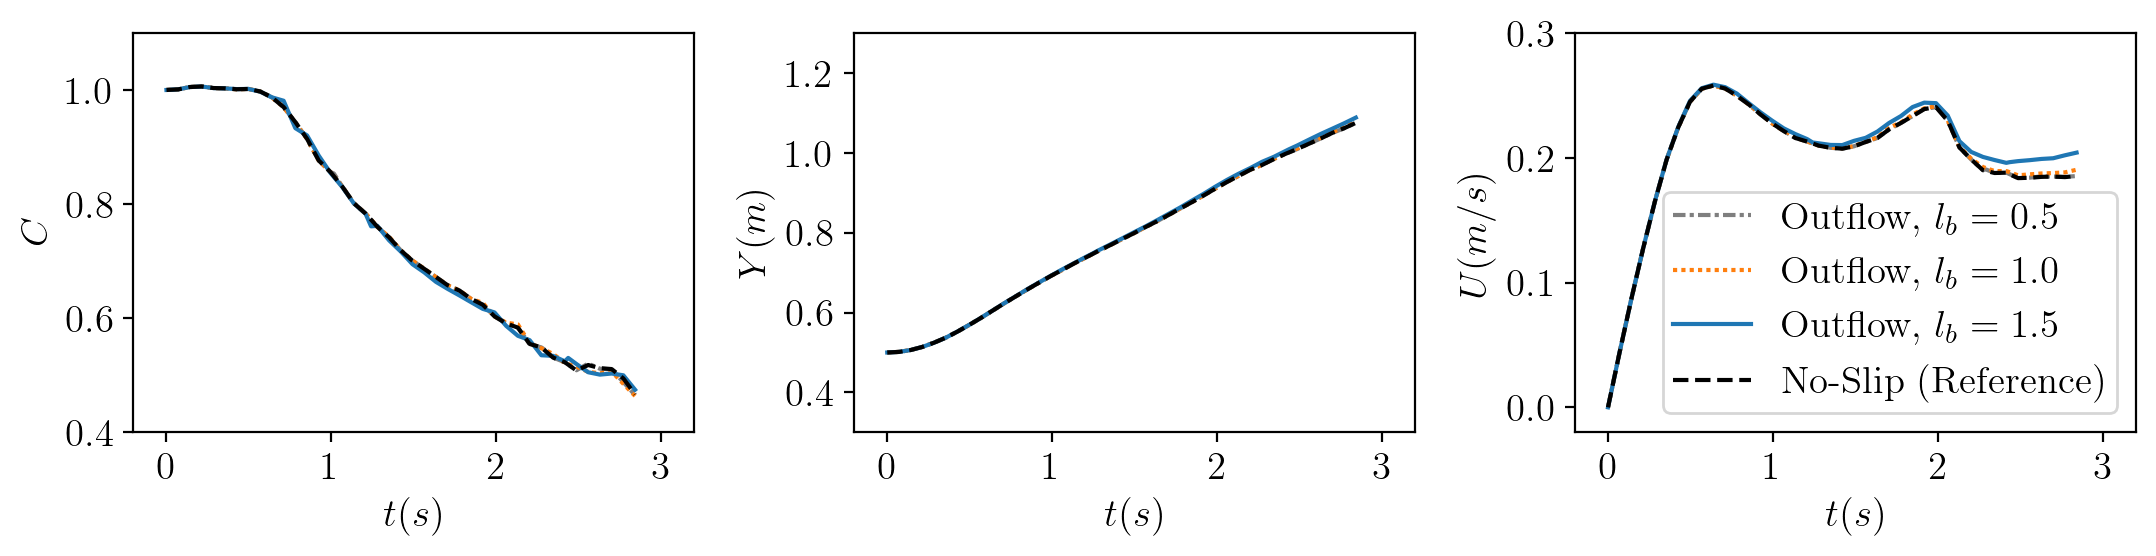

In [9]:
pyplot.rc("font", family="serif", size=14, weight="bold")
pyplot.rc("axes", labelweight="bold", titleweight="bold")
pyplot.rc("text", usetex=True)

QuantIndex = [2, 3, 4]
Figure, PlotList = pyplot.subplots(1, len(QuantIndex), figsize=(11,3), dpi=200)

for Plot, Index in zip(PlotList, QuantIndex):

    Linestyles = itertools.cycle(((0, (3, 1, 1, 1)),(0, (1, 1)), "-", "--"))
    Colors = itertools.cycle(("tab:gray","tab:orange","tab:blue","black"))
    Linewidths = itertools.cycle((1.5,1.5,1.5,1.5))
    
    for key in Results:
        end = -10
            
        Plot.plot(Results[key][:end,0]*LocalModule.SIM_SCALE[0], 
                  Results[key][:end,Index]*LocalModule.SIM_SCALE[Index], 
                  linewidth=next(Linewidths), linestyle=next(Linestyles), color=next(Colors))

    if Index == 2:
        Plot.set_ylim([0.4,1.1])
        Plot.set_ylabel(r"$C$", rotation=90)
    elif Index == 3:
        Plot.set_ylim([0.3,1.3])
        Plot.set_ylabel(r"$Y (m)$", rotation=90)
    elif Index == 4:
        Plot.set_ylim([-0.02,0.3])
        Plot.set_ylabel(r"$U (m/s)$", rotation=90)
        
    Plot.set_xlim([-0.2,3.2])
    Plot.set_xlabel(r"$t(s)$")

pyplot.legend([f"Outflow, $l_b=0.5$",f"Outflow, $l_b=1.0$",f"Outflow, $l_b=1.5$",f"No-Slip (Reference)"], borderpad=0.25)
pyplot.tight_layout()
#pyplot.savefig("/Users/Akash/Desktop/fig_grid_compare.png")
pyplot.show()

In [10]:
DsetDirs, FileTags = LocalModule.case2_outflow_contour_dict()
Datasets = {}
for key in DsetDirs:
    Datasets[key] = LocalModule.read_datasets(DsetDirs[key], FileTags[key])

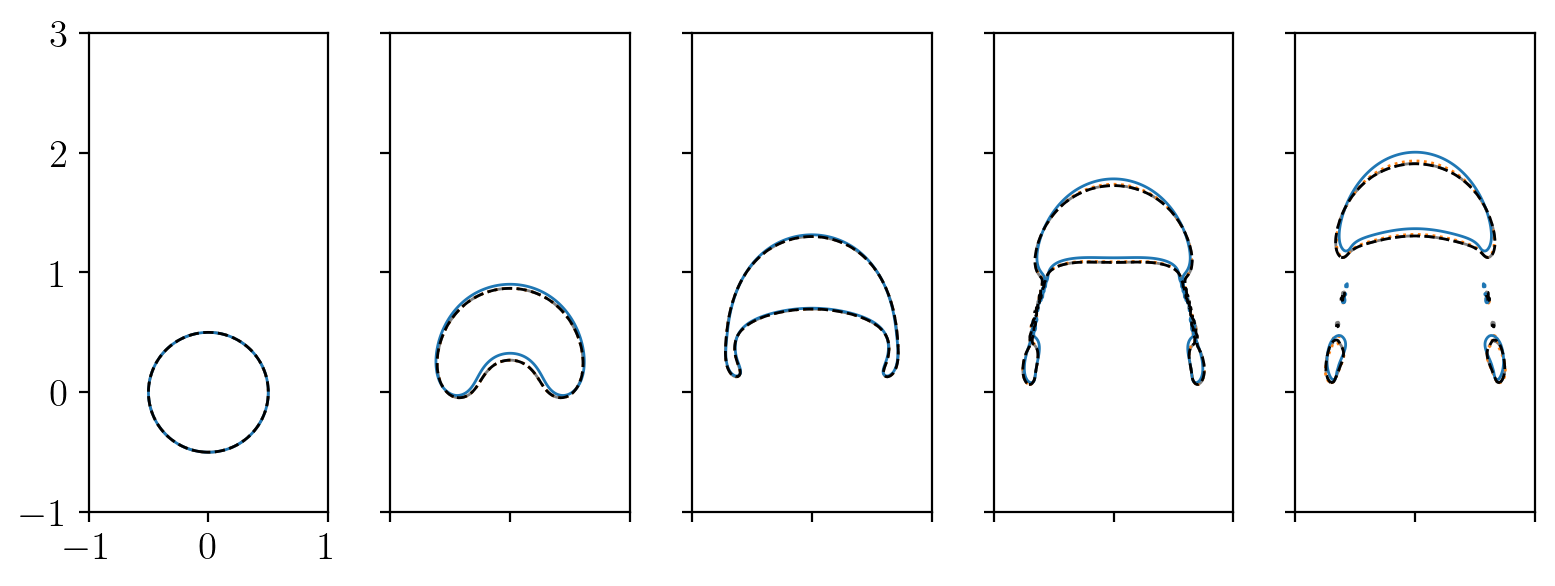

In [11]:
pyplot.rc("font", family="serif", size=14, weight="bold")
pyplot.rc("axes", labelweight="bold", titleweight="bold")
pyplot.rc("text", usetex=True)

FileIndex = [*range(5)]
Figure, PlotList = pyplot.subplots(1, len(FileIndex), figsize=(8,3), dpi=200)

for Plot, Index in zip(PlotList,FileIndex):

    Linestyles = itertools.cycle(("-.",":", "-", "--"))
    Colors = itertools.cycle(("tab:gray","tab:orange","tab:blue","black"))
    Linewidths = itertools.cycle((1,1,1,1))

    for key in Datasets:
        Merged = boxkit.mergeblocks(Datasets[key][Index], ["dfun"])
        Merged.fill_guard_cells()
        flash_box.lset_plot_contour_2d(Plot, Merged, 
                                       linestyles=next(Linestyles), 
                                       linewidths=next(Linewidths), 
                                       colors=next(Colors)) 
    Plot.set_aspect('equal')
    Plot.set_xlim([-1,1])
    Plot.set_ylim([-1,3])
    if Index != 0:
        Plot.xaxis.set_tick_params(labelbottom=False)
        Plot.yaxis.set_tick_params(labelbottom=False)

#pyplot.axis('equal')
#pyplot.savefig("/Users/Akash/Desktop/fig_grid_bubble.png")
#pyplot.xlabel([-1, 1])
pyplot.tight_layout()
pyplot.show()